In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First, uninstall any potentially conflicting packages
!pip uninstall -y tensorflow tensorflow-model-optimization nibabel

# Reinstall required packages in a specific order to avoid conflicts
!pip install numpy pandas scikit-learn
!pip install nibabel
!pip install tensorflow==2.10.1  # Use a specific version to avoid conflicts
!pip install tensorflow-model-optimization
!pip install shap


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: nibabel 5.3.2
Uninstalling nibabel-5.3.2:
  Successfully uninstalled nibabel-5.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd

# Define base path and label file
base_path = '/content/drive/MyDrive/Dementia Hunters /mri/'
label_file = '/content/drive/MyDrive/Dementia Hunters /mri/oasis_cross-sectional.xlsx'

# Load demographic data
demographic_data = pd.read_excel(label_file)

# Filter and process labels
# Assuming CDR > 0 indicates Alzheimer's, else 0 for control
demographic_data['Alzheimers'] = (demographic_data['CDR'].fillna(0) > 0).astype(int)

# Prepare file paths and labels
file_paths = []
labels = []

# Loop through each entry in the demographic data
for i in range(1, 401):
    file_name = f"aseg{i:03d}.mgz"
    file_path = os.path.join(base_path, file_name)

    # Check if file exists to avoid errors
    if os.path.exists(file_path):
        file_paths.append(file_path)

        # Get the corresponding label for Alzheimer's
        # Assuming the demographic data has a matching index or identifier column
        labels.append(demographic_data.loc[i - 1, 'Alzheimers'])  # Adjust based on the structure of your file

# Convert labels to numpy array for easier processing
labels = np.array(labels)

# At this point, file_paths contains paths to MRI files and labels contains the Alzheimer's labels (1 or 0)
print(f"Loaded {len(file_paths)} MRI files and labels.")


Loaded 255 MRI files and labels.


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    21: "Line-1",
    22: "Line-2",
    23: "Line-3",
    24: "CSF",
    25: "Left-Lesion",
    26: "Left-Accumbens-area",
    27: "Left-Substancia-Nigra",
    28: "Left-VentralDC",
    29: "Left-undetermined",
    30: "Left-vessel",
    31: "Left-choroid-plexus",
    32: "Left-F3orb",
    33: "Left-lOg",
    34: "Left-aOg",
    35: "Left-mOg",
    36: "Left-pOg",
    37: "Left-Stellate",
    38: "Left-Porg",
    39: "Left-Aorg",
    40: "Right-Cerebral-Exterior",
    41: "Right-Cerebral-White-Matter",
    42: "Right-Cerebral-Cortex",
    43: "Right-Lateral-Ventricle",
    44: "Right-Inf-Lat-Vent",
    45: "Right-Cerebellum-Exterior",
    46: "Right-Cerebellum-White-Matter",
    47: "Right-Cerebellum-Cortex",
    48: "Right-Thalamus",
    49: "Right-Thalamus-Proper",
    50: "Right-Caudate",
    51: "Right-Putamen",
    52: "Right-Pallidum",
    53: "Right-Hippocampus",
    54: "Right-Amygdala",
    55: "Right-Insula",
    56: "Right-Operculum",
    57: "Right-Lesion",
    58: "Right-Accumbens-area",
    59: "Right-Substancia-Nigra",
    60: "Right-VentralDC",
    61: "Right-undetermined",
    62: "Right-vessel",
    63: "Right-choroid-plexus",
    64: "Right-F3orb",
    65: "Right-lOg",
    66: "Right-aOg",
    67: "Right-mOg",
    68: "Right-pOg",
    69: "Right-Stellate",
    70: "Right-Porg",
    71: "Right-Aorg",
    72: "5th-Ventricle",
    73: "Left-Interior",
    74: "Right-Interior",
    77: "WM-hypointensities",
    78: "Left-WM-hypointensities",
    79: "Right-WM-hypointensities",
    80: "non-WM-hypointensities",
    81: "Left-non-WM-hypointensities",
    82: "Right-non-WM-hypointensities",
    83: "Left-F1",
    84: "Right-F1",
    85: "Optic-Chiasm",
    192: "Corpus_Callosum",
    86: "Left_future_WMSA",
    87: "Right_future_WMSA",
    88: "future_WMSA",
    96: "Left-Amygdala-Anterior",
    97: "Right-Amygdala-Anterior",
    98: "Dura"


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from joblib import Parallel, delayed

# Define the base path and label file
base_path = '/content/drive/MyDrive/Dementia Hunters /mri/'
label_file = '/content/drive/MyDrive/Dementia Hunters /mri/oasis_cross-sectional.xlsx'

# Define the segment labels dictionary
segment_labels = {
    0: "Unknown",
    1: "Left-Cerebral-Exterior",
    2: "Left-Cerebral-White-Matter",
    3: "Left-Cerebral-Cortex",
    4: "Left-Lateral-Ventricle",
    5: "Left-Inf-Lat-Vent",
    6: "Left-Cerebellum-Exterior",
    7: "Left-Cerebellum-White-Matter",
    8: "Left-Cerebellum-Cortex",
    9: "Left-Thalamus",
    10: "Left-Thalamus-Proper",
    11: "Left-Caudate",
    12: "Left-Putamen",
    13: "Left-Pallidum",
    14: "3rd-Ventricle",
    15: "4th-Ventricle",
    16: "Brain-Stem",
    17: "Left-Hippocampus",
    18: "Left-Amygdala",
    19: "Left-Insula",
    20: "Left-Operculum",
    21: "Line-1",
    22: "Line-2",
    23: "Line-3",
    24: "CSF",
    25: "Left-Lesion",
    26: "Left-Accumbens-area",
    27: "Left-Substancia-Nigra",
    28: "Left-VentralDC",
    29: "Left-undetermined",
    30: "Left-vessel",
    31: "Left-choroid-plexus",
    32: "Left-F3orb",
    33: "Left-lOg",
    34: "Left-aOg",
    35: "Left-mOg",
    36: "Left-pOg",
    37: "Left-Stellate",
    38: "Left-Porg",
    39: "Left-Aorg",
    40: "Right-Cerebral-Exterior",
    41: "Right-Cerebral-White-Matter",
    42: "Right-Cerebral-Cortex",
    43: "Right-Lateral-Ventricle",
    44: "Right-Inf-Lat-Vent",
    45: "Right-Cerebellum-Exterior",
    46: "Right-Cerebellum-White-Matter",
    47: "Right-Cerebellum-Cortex",
    48: "Right-Thalamus",
    49: "Right-Thalamus-Proper",
    50: "Right-Caudate",
    51: "Right-Putamen",
    52: "Right-Pallidum",
    53: "Right-Hippocampus",
    54: "Right-Amygdala",
    55: "Right-Insula",
    56: "Right-Operculum",
    57: "Right-Lesion",
    58: "Right-Accumbens-area",
    59: "Right-Substancia-Nigra",
    60: "Right-VentralDC",
    61: "Right-undetermined",
    62: "Right-vessel",
    63: "Right-choroid-plexus",
    64: "Right-F3orb",
    65: "Right-lOg",
    66: "Right-aOg",
    67: "Right-mOg",
    68: "Right-pOg",
    69: "Right-Stellate",
    70: "Right-Porg",
    71: "Right-Aorg",
    72: "5th-Ventricle",
    73: "Left-Interior",
    74: "Right-Interior",
    77: "WM-hypointensities",
    78: "Left-WM-hypointensities",
    79: "Right-WM-hypointensities",
    80: "non-WM-hypointensities"
    81: "Left-non-WM-hypointensities",
    82: "Right-non-WM-hypointensities",
    83: "Left-F1",
    84: "Right-F1",
    85: "Optic-Chiasm",
    192: "Corpus_Callosum",
    86: "Left_future_WMSA",
    87: "Right_future_WMSA",
    88: "future_WMSA",
    96: "Left-Amygdala-Anterior",
    97: "Right-Amygdala-Anterior",
    98: "Dura",
    100: "Left-wm-intensity-abnormality",
    101: "Left-caudate-intensity-abnormality",
    102: "Left-putamen-intensity-abnormality",
    103: "Left-accumbens-intensity-abnormality",
    104: "Left-pallidum-intensity-abnormality",
    105: "Left-amygdala-intensity-abnormality",
    106: "Left-hippocampus-intensity-abnormality",
    107: "Left-thalamus-intensity-abnormality",
    108: "Left-VDC-intensity-abnormality",
    109: "Right-wm-intensity-abnormality",
    110: "Right-caudate-intensity-abnormality",
    111: "Right-putamen-intensity-abnormality",
    112: "Right-accumbens-intensity-abnormality",
    113: "Right-pallidum-intensity-abnormality",
    114: "Right-amygdala-intensity-abnormality",
    115: "Right-hippocampus-intensity-abnormality",
    116: "Right-thalamus-intensity-abnormality",
    117: "Right-VDC-intensity-abnormality",
    118: "Epidermis",
    119: "Conn-Tissue",
    120: "SC-Fat-Muscle",
    121: "Cranium",
    122: "CSF-SA",
    123: "Muscle",
    124: "Ear",
    125: "Adipose",
    126: "Spinal-Cord",
    127: "Soft-Tissue",
    128: "Nerve",
    129: "Bone",
    130: "Air",
    131: "Orbital-Fat",
    132: "Tongue",
    133: "Nasal-Structures",
    134: "Globe",
    135: "Teeth",
    136: "Left-Caudate-Putamen",
    137: "Right-Caudate-Putamen",
    138: "Left-Claustrum",
    139: "Right-Claustrum",
    140: "Cornea",
    142: "Diploe",
    143: "Vitreous-Humor",
    144: "Lens",
    145: "Aqueous-Humor",
    146: "Outer-Table",
    147: "Inner-Table",
    148: "Periosteum",
    149: "Endosteum",
    150: "R-C-S",
    151: "Iris",
    152: "SC-Adipose-Muscle",
    153: "SC-Tissue",
    154: "Orbital-Adipose",
    155: "Left-IntCapsule-Ant",
    156: "Right-IntCapsule-Ant",
    157: "Left-IntCapsule-Pos",
    158: "Right-IntCapsule-Pos",
    159: "Left-Cerebral-WM-unmyelinated",
    160: "Right-Cerebral-WM-unmyelinated",
    161: "Left-Cerebral-WM-myelinated",
    162: "Right-Cerebral-WM-myelinated",
    163: "Left-Subcortical-Gray-Matter",
    164: "Right-Subcortical-Gray-Matter",
    165: "Skull",
    166: "Posterior-fossa",
    167: "Scalp",
    168: "Hematoma",
    169: "Left-Basal-Ganglia",
    176: "Right-Basal-Ganglia",
    170: "brainstem",
    171: "DCG",
    172: "Vermis",
    173: "Midbrain",
    174: "Pons",
    175: "Medulla",
    177: "Vermis-White-Matter",
    178: "SCP",
    179: "Floculus",
    180: "Left-Cortical-Dysplasia",
    181: "Right-Cortical-Dysplasia",
    182: "CblumNodulus",
    193: "Left-hippocampal_fissure",
    194: "Left-CADG-head",
    195: "Left-subiculum",
    196: "Left-fimbria",
    197: "Right-hippocampal_fissure",
    198: "Right-CADG-head",
    199: "Right-subiculum",
    200: "Right-fimbria",
    201: "alveus",
    202: "perforant_pathway",
    203: "parasubiculum",
    204: "presubiculum",
    205: "subiculum",
    206: "CA1",
    207: "CA2",
    208: "CA3",
    209: "CA4",
    210: "GC-DG",
    211: "HATA",
    212: "fimbria",
    213: "lateral_ventricle",
    214: "molecular_layer_HP",
    215: "hippocampal_fissure",
    216: "entorhinal_cortex",
    217: "molecular_layer_subiculum",
    218: "Amygdala",
    219: "Cerebral_White_Matter",
    220: "Cerebral_Cortex",
    221: "Inf_Lat_Vent",
    222: "Perirhinal",
    223: "Cerebral_White_Matter_Edge",
    224: "Background",
    225: "Ectorhinal",
    226: "HP_tail",
    250: "Fornix",
    251: "CC_Posterior",
    252: "CC_Mid_Posterior",
    253: "CC_Central",
    254: "CC_Mid_Anterior",
    255: "CC_Anterior",
    256: "Voxel-Unchanged",
    257: "CSF-ExtraCerebral",
    258: "Head-ExtraCerebral",
    259: "SkullApprox",
    260: "BoneOrAir",
    261: "PossibleFluid",
    262: "Sinus",
    263: "Left-Eustachian",
    264: "Right-Eustachian",
    331: "Aorta",
    332: "Left-Common-IliacA",
    333: "Right-Common-IliacA",
    334: "Left-External-IliacA",
    335: "Right-External-IliacA",
    336: "Left-Internal-IliacA",
    337: "Right-Internal-IliacA",
    338: "Left-Lateral-SacralA",
    339: "Right-Lateral-SacralA",
    340: "Left-ObturatorA",
    341: "Right-ObturatorA",
    342: "Left-Internal-PudendalA",
    343: "Right-Internal-PudendalA",
    344: "Left-UmbilicalA",
    345: "Right-UmbilicalA",
    346: "Left-Inf-RectalA",
    347: "Right-Inf-RectalA",
    348: "Left-Common-IliacV",
    349: "Right-Common-IliacV",
    350: "Left-External-IliacV",
    351: "Right-External-IliacV",
    352: "Left-Internal-IliacV",
    353: "Right-Internal-IliacV",
    354: "Left-ObturatorV",
    355: "Right-ObturatorV",
    356: "Left-Internal-PudendalV",
    357: "Right-Internal-PudendalV",
    358: "Pos-Lymph",
    359: "Neg-Lymph"
}

# Load demographic data
demographic_data = pd.read_excel(label_file)
demographic_data['Alzheimers'] = (demographic_data['CDR'].fillna(0) > 0).astype(int)

# Define helper functions to calculate features
def calculate_volume(segment_data):
    return np.sum(segment_data)

def calculate_width(segment_data):
    x_coords = np.where(np.any(segment_data, axis=(1, 2)))[0]
    return x_coords[-1] - x_coords[0] if x_coords.size > 0 else 0

def calculate_length(segment_data):
    y_coords = np.where(np.any(segment_data, axis=(0, 2)))[0]
    return y_coords[-1] - y_coords[0] if y_coords.size > 0 else 0

def calculate_height(segment_data):
    z_coords = np.where(np.any(segment_data, axis=(0, 1)))[0]
    return z_coords[-1] - z_coords[0] if z_coords.size > 0 else 0

# Extract features for all segments in a single MRI file
def extract_features(file_path):
    mgz_file = nib.load(file_path)
    data = mgz_file.get_fdata()
    features = []

    for label_id, label_name in segment_labels.items():
        segment_data = (data == label_id).astype(np.float32)

        volume = calculate_volume(segment_data)
        width = calculate_width(segment_data)
        length = calculate_length(segment_data)
        height = calculate_height(segment_data)

        features.extend([volume, width, length, height])
    return features

# Prepare column names based on segment labels
columns = []
for label_id, label_name in segment_labels.items():
    columns.extend([
        f"volume_{label_name}",
        f"width_{label_name}",
        f"length_{label_name}",
        f"height_{label_name}"
    ])

# Parallelize feature extraction across MRI files
file_paths = [os.path.join(base_path, f"aseg{i:03d}.mgz") for i in range(1, 401) if os.path.exists(os.path.join(base_path, f"aseg{i:03d}.mgz"))]
labels = demographic_data.loc[:len(file_paths) - 1, 'Alzheimers'].values

# Use joblib to parallelize the extraction across files
features = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(extract_features)(file_path) for file_path in file_paths)

# Convert to DataFrame with custom column names
features_df = pd.DataFrame(features, columns=columns)
labels_df = pd.DataFrame(labels, columns=["Label"])

# Combine features and labels
dataset = pd.concat([features_df, labels_df], axis=1)

# Save to CSV




SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-6-dfacb349808e>, line 91)

In [ ]:
dataset.to_csv('/content/dataset2.csv', index=False)
print("Dataset saved successfully with custom column names.")

NameError: name 'dataset' is not defined

In [ ]:
# Create a DataFrame
features =
feature_df = pd.DataFrame(features)
label_df = pd.DataFrame(labels, columns=["Label"])
dataset = pd.concat([feature_df, label_df], axis=1)

# Save to CSV
#dataset.to_csv('/content/drive/MyDrive/Dementia_Hunters/dataset.csv', index=False)
#print("Dataset saved successfully.")

NameError: name 'features' is not defined

In [ ]:
dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the saved dataset
dataset_path = '/content/drive/MyDrive/Dementia Hunters /mri/dataset.csv'
dataset = pd.read_csv(dataset_path)

# Split features and labels
features = dataset.drop(columns=["Label"])  # Assuming 'Label' column contains Alzheimer's label
labels = dataset["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")


Random Forest Model Accuracy: 80.39%


In [ ]:
dataset

,Unnamed: 0,volume_Unknown,width_Unknown,length_Unknown,height_Unknown,volume_Left-Cerebral-Exterior,width_Left-Cerebral-Exterior,length_Left-Cerebral-Exterior,height_Left-Cerebral-Exterior,volume_Left-Cerebral-White-Matter,...,length_Right-Internal-PudendalV,height_Right-Internal-PudendalV,volume_Pos-Lymph,width_Pos-Lymph,length_Pos-Lymph,height_Pos-Lymph,volume_Neg-Lymph,width_Neg-Lymph,length_Neg-Lymph,height_Neg-Lymph
0,0,15621568.0,255,255,255,0.0,0,0,0,212625.0,...,0,0,0.0,0,0,0,0.0,0,0,0
1,1,15568391.0,255,255,255,0.0,0,0,0,197024.0,...,0,0,0.0,0,0,0,0.0,0,0,0
2,2,15589251.0,255,255,255,0.0,0,0,0,205311.0,...,0,0,0.0,0,0,0,0.0,0,0,0
3,3,15680812.0,255,255,255,0.0,0,0,0,200780.0,...,0,0,0.0,0,0,0,0.0,0,0,0
4,4,15572733.0,255,255,255,0.0,0,0,0,180317.0,...,0,0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,15514134.0,255,255,255,0.0,0,0,0,228281.0,...,0,0,0.0,0,0,0,0.0,0,0,0
251,251,15785484.0,255,255,255,0.0,0,0,0,178683.0,...,0,0,0.0,0,0,0,0.0,0,0,0
252,252,15624839.0,255,255,255,0.0,0,0,0,209457.0,...,0,0,0.0,0,0,0,0.0,0,0,0
253,253,15735349.0,255,255,255,0.0,0,0,0,182064.0,...,0,0,0.0,0,0,0,0.0,0,0,0


In [ ]:
features_df = pd.read_csv('/content/drive/MyDrive/Dementia Hunters /mri/dataset2.csv')
features_df

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dementia Hunters /mri/dataset3.csv')
df

,volume_Unknown,volume_Left-Cerebral-White-Matter,volume_Left-Cerebral-Cortex,volume_Left-Lateral-Ventricle,volume_Left-Inf-Lat-Vent,volume_Left-Cerebellum-White-Matter,volume_Left-Cerebellum-Cortex,volume_Left-Thalamus-Proper,volume_Left-Caudate,volume_Left-Putamen,...,volume_Right-WM-hypointensities,volume_Left-non-WM-hypointensities,volume_Right-non-WM-hypointensities,volume_Optic-Chiasm,volume_CC_Anterior,Label,Age,ASF,eTIV,nWBV
0,15773442.0,195647.0,179931.0,27389.0,1099.0,10859.0,42643.0,5761.0,3567.0,4555.0,...,3806.0,199.0,11.0,288.0,0.0,0,74,1,1344,743
1,15769269.0,201746.0,196948.0,9156.0,295.0,11930.0,43304.0,6268.0,3390.0,5272.0,...,857.0,9.0,2.0,229.0,0.0,0,55,1,1147,810
2,15554738.0,212700.0,268986.0,7681.0,417.0,13964.0,57408.0,7956.0,3834.0,5436.0,...,1109.0,4.0,43.0,412.0,0.0,1,73,1,1454,708
3,15744986.0,181456.0,192057.0,41789.0,2133.0,11523.0,45826.0,5250.0,4475.0,4254.0,...,4827.0,140.0,65.0,268.0,0.0,0,28,1,1588,803
4,15597253.0,212820.0,258336.0,5193.0,411.0,13217.0,52122.0,6874.0,3789.0,6174.0,...,1002.0,8.0,4.0,215.0,0.0,0,18,1,1737,848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,15514134.0,228281.0,279254.0,4684.0,519.0,14435.0,52860.0,7798.0,4806.0,6693.0,...,1028.0,24.0,1.0,314.0,0.0,0,74,0,1806,754
330,15785484.0,178683.0,218122.0,2931.0,420.0,11441.0,45431.0,7881.0,3593.0,5927.0,...,852.0,16.0,2.0,220.0,0.0,0,45,1,1549,813
331,15624839.0,209457.0,226701.0,39084.0,2458.0,12506.0,51936.0,6337.0,4228.0,5565.0,...,2799.0,253.0,8.0,256.0,0.0,0,46,1,1161,841
332,15735349.0,182064.0,214445.0,25843.0,2288.0,11524.0,48768.0,5746.0,4229.0,4909.0,...,5787.0,225.0,158.0,385.0,0.0,0,22,1,1572,856


In [ ]:
labels = df['Label']
features = df.drop(columns = ['Label'])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")



Random Forest Model Accuracy: 86.57%


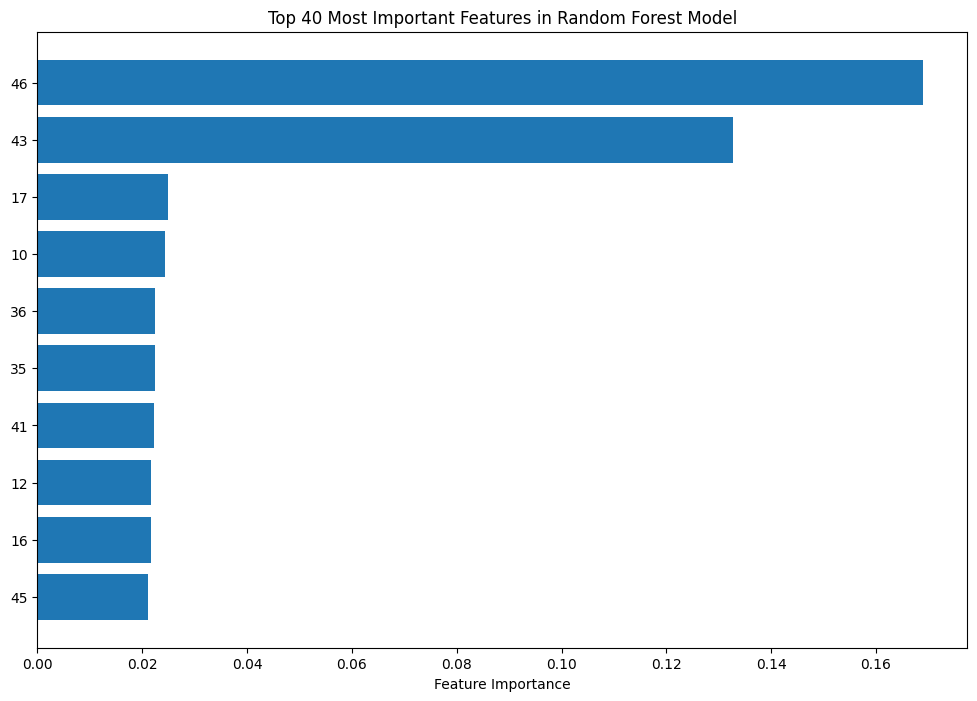

Indices of the top 40 most important features: [46 43 17 10 36 35 41 12 16 45]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature importance
feature_importances = rf_model.feature_importances_

# Get indices of the top 40 most important features
top_40_indices = np.argsort(feature_importances)[-10:][::-1]
top_40_importances = feature_importances[top_40_indices]

# Plot the top 40 most important features
plt.figure(figsize=(12, 8))
plt.barh(range(10), top_40_importances, align='center')
plt.yticks(range(10), top_40_indices)
plt.xlabel("Feature Importance")
plt.title("Top 40 Most Important Features in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

# Print the indices of the top 40 most important features
print("Indices of the top 40 most important features:", top_40_indices)


In [ ]:
# Assuming `df` is the DataFrame used to train the Random Forest model
# Get the feature names from the DataFrame
feature_names = dataset.columns

# Translate the top indices to their column names
top_40_feature_names = feature_names[top_40_indices]

# Print the feature names corresponding to the top 40 indices
print("Names of the top 40 most important features:", top_40_feature_names)


NameError: name 'dataset' is not defined

In [ ]:
!git clone https://github.com/scikit-learn-contrib/skope-rules.git
%cd skope-rules

fatal: destination path 'skope-rules' already exists and is not an empty directory.
/content/skope-rules


In [ ]:
pip install -r requirements.txt


In [ ]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
 

In [ ]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip show scikit-learn imodels


Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 

In [ ]:
pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Ch

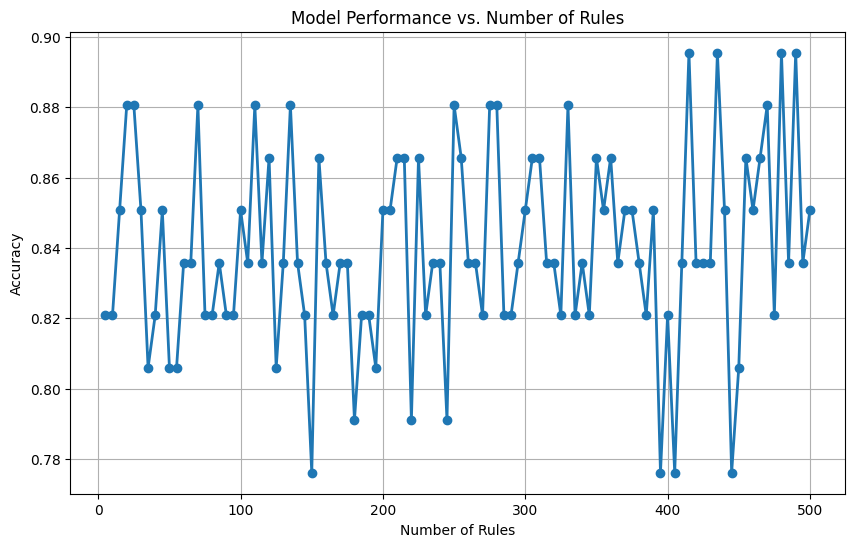

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from imodels import RuleFitClassifier

rule_counts = range(5, 501, 5)
accuracies = []

# Iterate over the range of rules
for max_rules in rule_counts:
    # Create and train the RuleFitClassifier with the current number of rules
    rule_model = RuleFitClassifier(max_rules=max_rules)
    rule_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rule_model.predict(X_test)

    # Calculate and store accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the number of rules vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(rule_counts, accuracies, marker='o', linestyle='-', linewidth=2)
plt.title('Model Performance vs. Number of Rules')
plt.xlabel('Number of Rules')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data

# Train the model
rule_model.fit(X_train, y_train)

# Get predictions
y_pred = rule_model.predict(X_test)
y_pred_proba = rule_model.predict_proba(X_test)[:, 1]  # For AUC if binary classification


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get predictions
y_pred = rule_model.predict(X_test)
y_pred_proba = rule_model.predict_proba(X_test)[:, 1]  # For AUC if binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # Binary classification

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.82
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC: 0.88


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
!pip install imbalanced-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
balanced_counts = np.bincount(y_balanced)
print("Balanced class distribution:", dict(enumerate(balanced_counts)))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Balanced class distribution: {0: 202, 1: 202}


In [ ]:
rule_model = RuleFitClassifier(max_rules=100)
rule_model.fit(X_train, y_train)
print(rule_model.rules_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nWBV <= 757.5 and volume_5th-Ventricle <= 83.0 and volume_Left-Accumbens-area <= 1030.0 and volume_Right-Caudate > 3390.5 and volume_Right-Cerebellum-Cortex > 51997.0 and volume_Right-Lateral-Ventricle <= 4758.0, nWBV <= 746.0 and volume_Right-Putamen <= 5248.5 and volume_Right-non-WM-hypointensities <= 14.5, Age > 84.5 and nWBV > 695.5, nWBV <= 765.5 and volume_Left-Accumbens-area <= 1053.5 and volume_Left-Putamen > 4891.5 and volume_Right-Putamen <= 5426.0 and volume_Right-non-WM-hypointensities <= 18.5, nWBV <= 774.5 and nWBV > 678.5 and volume_Brain-Stem > 18399.0 and volume_Left-Amygdala > 1709.0 and volume_Left-Caudate > 3326.5 and volume_Left-WM-hypointensities > 1055.0, Age <= 83.5 and Age > 65.5 and volume_5th-Ventricle <= 33.5 and volume_Left-Thalamus-Proper <= 6540.0, nWBV <= 716.5 and volume_Left-Inf-Lat-Vent > 2104.0, nWBV <= 785.5 and volume_Left-Hippocampus > 4097.0 and volume_Left-vessel > 64.0 and volume_Right-Accumbens-area > 672.5 and volume_Right-Inf-Lat-Vent <= 48

In [ ]:
# Get predictions
y_pred = rule_model.predict(X_test)
y_pred_proba = rule_model.predict_proba(X_test)[:, 1]  # For AUC if binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # Binary classification

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.81
Precision: 0.44
Recall: 0.33
F1 Score: 0.38
AUC: 0.83


In [ ]:
print(rule_model.rules_)

[nWBV <= 757.5 and volume_5th-Ventricle <= 83.0 and volume_Left-Accumbens-area <= 1030.0 and volume_Right-Caudate > 3390.5 and volume_Right-Cerebellum-Cortex > 51997.0 and volume_Right-Lateral-Ventricle <= 4758.0, nWBV <= 746.0 and volume_Right-Putamen <= 5248.5 and volume_Right-non-WM-hypointensities <= 14.5, Age > 84.5 and nWBV > 695.5, nWBV <= 765.5 and volume_Left-Accumbens-area <= 1053.5 and volume_Left-Putamen > 4891.5 and volume_Right-Putamen <= 5426.0 and volume_Right-non-WM-hypointensities <= 18.5, nWBV <= 774.5 and nWBV > 678.5 and volume_Brain-Stem > 18399.0 and volume_Left-Amygdala > 1709.0 and volume_Left-Caudate > 3326.5 and volume_Left-WM-hypointensities > 1055.0, Age <= 83.5 and Age > 65.5 and volume_5th-Ventricle <= 33.5 and volume_Left-Thalamus-Proper <= 6540.0, nWBV <= 716.5 and volume_Left-Inf-Lat-Vent > 2104.0, nWBV <= 785.5 and volume_Left-Hippocampus > 4097.0 and volume_Left-vessel > 64.0 and volume_Right-Accumbens-area > 672.5 and volume_Right-Inf-Lat-Vent <= 48

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
